In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

# Data Jakarta

In [ ]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 dfJ.drop(columns=['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mengatasi MV

In [ ]:
dfJ.isna().sum()

created_at    903
LT            903
LB            903
KT            903
KM            903
garasi        980
carport       934
lokasi        903
sertifikat    905
listrik       904
hadap         988
harga         903
URL           903
deskripsi     912
dtype: int64

In [ ]:
# Menghapus MV
dfJ.fillna(0, inplace = True)

In [ ]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.000000e+00,0,0
1020,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.000000e+00,0,0
1021,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.000000e+00,0,0
1022,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.000000e+00,0,0


## Melihat Tipe Data dalam Tabel Jakarta

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(dfJ))
# Ukuran Data
N, P = dfJ.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 1024, ', Kolom = ', 14)

In [ ]:
dfJ.dtypes

created_at     object
LT            float64
LB            float64
KT            float64
KM            float64
garasi        float64
carport       float64
lokasi         object
sertifikat     object
listrik       float64
hadap          object
harga         float64
URL            object
deskripsi      object
dtype: object

## Mengubah tipe data dalam Tabel Jakarta


In [ ]:
dfJ['KT'] = dfJ['KT'].astype('int64')
dfJ['KM'] = dfJ['KM'].astype('int64')
dfJ['garasi'] = dfJ['garasi'].astype('int64')
dfJ['carport'] = dfJ['carport'].astype('int64')
dfJ['sertifikat'] = dfJ['sertifikat'].astype('category')
dfJ['hadap'] = dfJ['hadap'].astype('category')

In [ ]:
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8,3,0,0,Jakarta Pusat,SHM,2200.0,0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2,1,0,1,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2,1,0,0,Jakarta Pusat,SHM,2200.0,0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2,2,0,1,Jakarta Pusat,SHM,2200.0,0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2,2,0,1,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.000000e+00,0,0
1020,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.000000e+00,0,0
1021,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.000000e+00,0,0
1022,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.000000e+00,0,0


## Rumusan Masalah

### Apakah banyaknya kamar tidur mempengaruhi harga jual pada rumah?

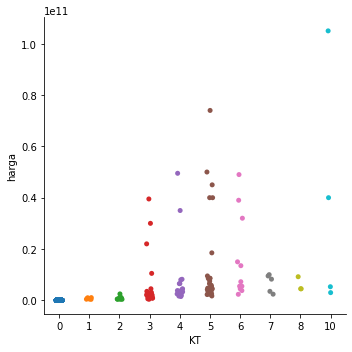

In [ ]:
p= sns.catplot(x="KT", y="harga", data=dfJ)
# Apa yang bisa dilihat dari hasil ini?

#### Kesimpulan rekomendasi untuk plot di atas:

Insight yang didapat dari hasil plot disini terdapat 2 Rumah dengan 10 Kamar Tidur dengan harga yang murah seharga dengan kamar tidur yang lebih sedikit. Untuk seseorang yang membutuhkan rumah dengan banyak kamar tidur dengan harga terjangkau untuk membuka usahan sewa kamar di daerah Jakarta, rumah tersebut menjadi menarik.

### Apakah luas tanah mempengaruhi harga jual pada rumah?

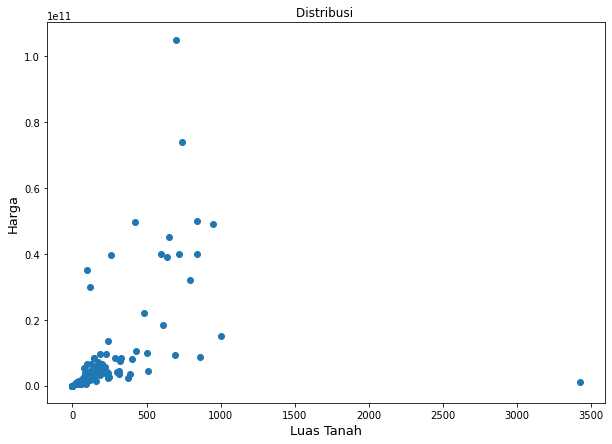

In [66]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(x = dfJ['LT'], y = dfJ['harga'])
plt.ylabel('Harga', fontsize=13)
plt.xlabel('Luas Tanah', fontsize=13)
plt.title('Distribusi ')
plt.show()

#### Kesimpulan dan Rekomendasi untuk plot di atas:

Dari plot tersebut, yang dapat kita lihat adalah antara Harga dan Luas Tanah memiliki korelasi positif dimana semakin luas tanahnya, harga juga semakin mahal.

Namun, jika kita sedang mencari rumah hunian dengan harga terjangkau dengan luas tanah >700 m², terdapat beberapa rumah dengan harga yang jauh lebih murah dari luas tanah yang serupa. 
Sehingga menarik untuk dilihat lebih lanjut.

# DATA Tangerang

In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfT.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Unnamed: 14,Unnamed: 15
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam...",NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,NaN,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a...",NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,NaN,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ...",NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,NaN,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA...",NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,NaN,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mengatasi MV

In [ ]:
dfT.isna().sum()

created_at       4
LT               4
LB               4
KT               4
KM               4
garasi          90
carport         36
lokasi           4
sertifikat       6
listrik         17
hadap           79
harga            4
URL              4
deskripsi        4
Unnamed: 14    128
Unnamed: 15    128
dtype: int64

## Melihat tipe data dalam tabel Tangerang

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(dfT))
# Ukuran Data
N, P = dfT.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 128, ', Kolom = ', 16)

In [ ]:
dfT.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi          object
sertifikat      object
listrik        float64
hadap           object
harga          float64
URL             object
deskripsi       object
Unnamed: 14    float64
Unnamed: 15    float64
dtype: object

In [ ]:
# Menghapus MV
dfT.fillna(0, inplace = True)

In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Unnamed: 14,Unnamed: 15
0,12-06-2021,60.0,50.0,3.0,2.0,0.0,0.0,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam...",0.0,0.0
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a...",0.0,0.0
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ...",0.0,0.0
3,12-06-2021,200.0,225.0,5.0,4.0,0.0,0.0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA...",0.0,0.0
4,12-06-2021,76.0,123.0,3.0,3.0,0.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3.0,2.0,0.0,0.0,"Poris, Tangerang",SHM,3500.0,0,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,0.0,0.0
124,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0
125,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0
126,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0,0.0,0.0


## Melihat tipe data dalam tabel Tangerang

In [ ]:
dfT['KT'] = dfT['KT'].astype('int64')
dfT['KM'] = dfT['KM'].astype('int64')
dfT['garasi'] = dfT['garasi'].astype('int64')
dfT['carport'] = dfT['carport'].astype('int64')
dfT['sertifikat'] = dfT['sertifikat'].astype('category')
dfT['hadap'] = dfT['hadap'].astype('category')

In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Unnamed: 14,Unnamed: 15
0,12-06-2021,60.0,50.0,3,2,0,0,"BSD CITY, TANGERANG",SHM,1300.0,Selatan,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam...",0.0,0.0
1,12-06-2021,72.0,54.0,2,1,1,1,"CISAUK, TANGERANG",SHM,1300.0,0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a...",0.0,0.0
2,12-06-2021,60.0,48.0,3,2,2,2,"CILEDUG, TANGERANG",SHM,2200.0,0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ...",0.0,0.0
3,12-06-2021,200.0,225.0,5,4,0,0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA...",0.0,0.0
4,12-06-2021,76.0,123.0,3,3,0,2,"PONDOK CABE, TANGERANG",SHM,2200.0,0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw...",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,12-08-2021,91.0,91.0,3,2,0,0,"Poris, Tangerang",SHM,3500.0,0,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...,0.0,0.0
124,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0.0
125,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0.0
126,0,0.0,0.0,0,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0.0


## Rumusan Masalah

### Apakah banyaknya kamar tidur mempengaruhi harga jual pada rumah?

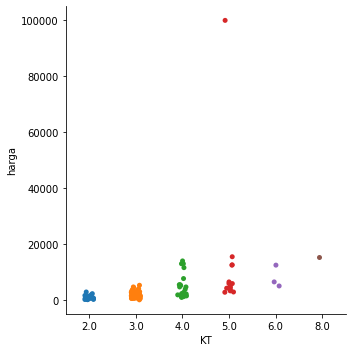

In [63]:
p=sns.catplot(x="KT",y = "harga",data=dfT)
# Apa yang bisa di lihat dari hasil ini?

#### Kesimpulan dan Rekomendasi dari plot di atas:

Hal menarik dari plot disini adalah diantara rumah-rumah lain yang memiliki harga yang relatif sama dibawah 200 juta, namun terdapat 1 rumah dengan 5 Kamar Tidur, namun memiliki harga 1 Milyar.
Jika kita ingin mencari tau lebih lanjut seperti apa bangunannya, rumah tersebut cukup menarik untuk dilihat lebih jauh.

### Apakah luas tanah mempengaruhi harga jual pada rumah?

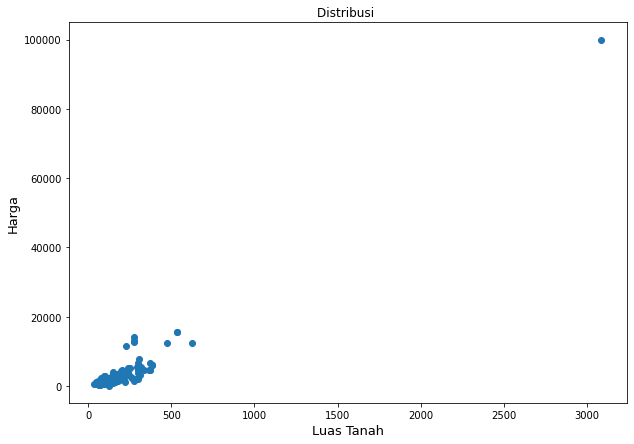

In [64]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(x = dfT['LT'], y = dfT['harga'])
plt.ylabel('Harga', fontsize=13)
plt.xlabel('Luas Tanah', fontsize=13)
plt.title('Distribusi ')
plt.show()

#### Kesimpulan dan Rekomendasi dari plot di atas:

Dari plot tersebut, yang dapat kita lihat adalah luas tanah di daerah Tanggerang relatif sama yaitu < 500m² dan harganya juga terjangkau yaitu kurang lebih 200jt.
Namun, jika kita sedang mencari rumah hunian dengan harga yang terbilang murah, sehingga menarik untuk di lihat

# Data Depok

## Mengatasi Missing Value



In [ ]:
dfD.isna().sum()

created_at     2
LT             1
LB             3
KT             3
KM             3
garasi        96
carport       27
lokasi         3
sertifikat     3
listrik       18
hadap         59
harga          3
URL            3
deskripsi      3
dtype: int64

In [67]:
dfD.fillna(0, inplace = True)
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6-12-2021,50,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6-12-2021,50,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6-12-2021,50,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6-12-2021,72,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Melihat Tipe Data

In [68]:
# Tipe Datanya : DataFrame (df)
print(type(dfD))
# Ukuran Data
N, P = dfD.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 998, ', Kolom = ', 26)

In [69]:
dfD.dtypes

created_at      object
LT              object
LB             float64
KT             float64
KM             float64
garasi         float64
carport        float64
lokasi          object
sertifikat      object
listrik        float64
hadap           object
harga          float64
URL             object
deskripsi       object
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
Unnamed: 17    float64
Unnamed: 18    float64
Unnamed: 19    float64
Unnamed: 20    float64
Unnamed: 21    float64
Unnamed: 22    float64
Unnamed: 23    float64
Unnamed: 24    float64
Unnamed: 25    float64
dtype: object

## Mengubah Tipe Data

In [79]:
dfD['KT'] = dfD['KT'].astype('int64')
dfD['KM'] = dfD['KM'].astype('int64')
dfD['garasi'] = dfD['garasi'].astype('int64')
dfD['carport'] = dfD['carport'].astype('int64')
dfD['sertifikat'] = dfD['sertifikat'].astype('category')
dfD['hadap'] = dfD['hadap'].astype('category')

In [72]:
dfD.dtypes

created_at       object
LT               object
LB              float64
KT                int64
KM                int64
garasi            int64
carport           int64
lokasi           object
sertifikat     category
listrik         float64
hadap          category
harga           float64
URL              object
deskripsi        object
Unnamed: 14     float64
Unnamed: 15     float64
Unnamed: 16     float64
Unnamed: 17     float64
Unnamed: 18     float64
Unnamed: 19     float64
Unnamed: 20     float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
Unnamed: 24     float64
Unnamed: 25     float64
dtype: object

## Rumusan Masalah

### Apakah banyaknya kamar tidur mempengaruhi harga jual pada rumah?

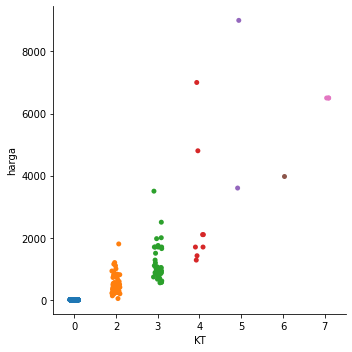

In [76]:
p=sns.catplot(x="KT",y = "harga",data=dfD)
# Apa yang bisa di lihat dari hasil ini?

#### Kesimpulan dan Rekomendasi dari plot di atas:

Korelasi harga rumah dengan banyaknya kamar tidur di depok menunjukan korelasi hang positif dimana semakin banyak kamar tidur, semakin mahal pula harga rumahnya.

Belum ada sesuatu yang menarik yang dapat diambil dari plot ini.

### Apakah luas bangunan mempengaruhi harga jual pada rumah?

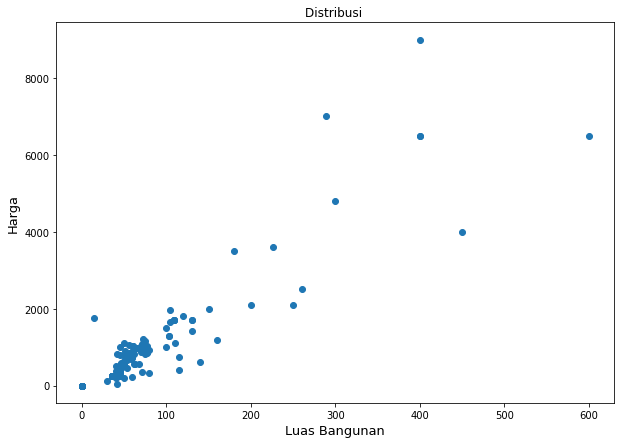

In [78]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(x = dfD['LB'], y = dfD['harga'])
plt.ylabel('Harga', fontsize=13)
plt.xlabel('Luas Bangunan', fontsize=13)
plt.title('Distribusi ')
plt.show()

#### Kesimpulan dan Rekomendasi dari plot di atas:

# Korelasi dari ketiga data tentang Penjualan Rumah (Jakarta, Tangerang, dan Depok)